# plot the success, failure, and high variances images

GRU 32 1
loaded ../models/inpainting_GRU_32_1_store_dict.npy


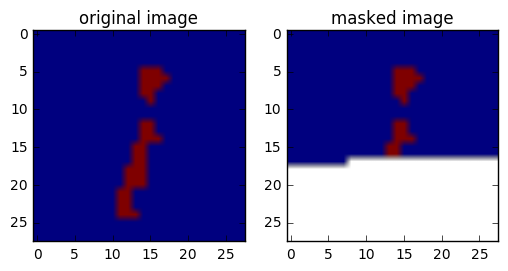

reconstructed images


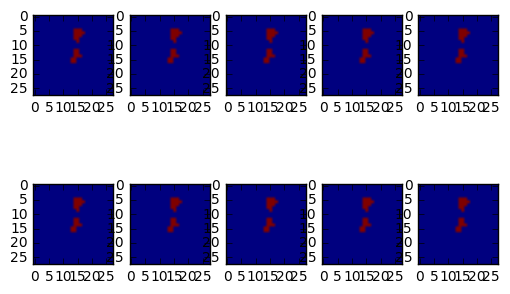

GRU 32 10
loaded ../models/inpainting_GRU_32_10_store_dict.npy


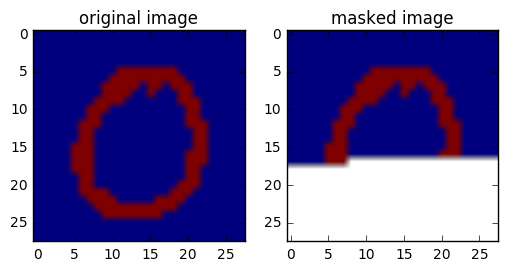

reconstructed images


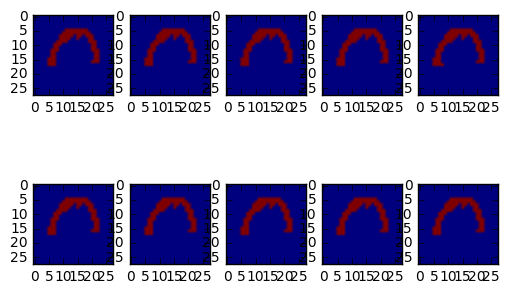

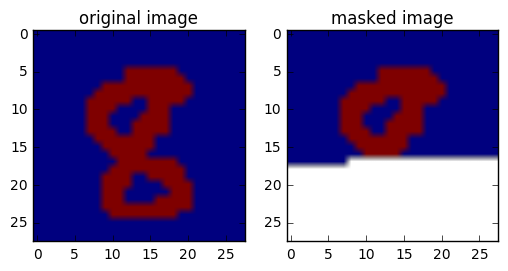

reconstructed images


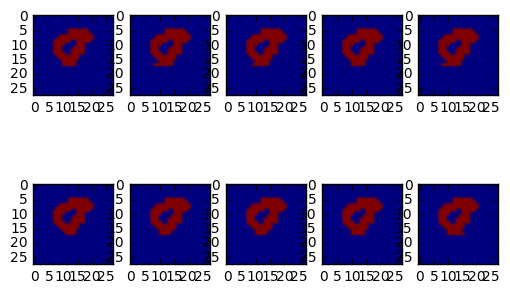

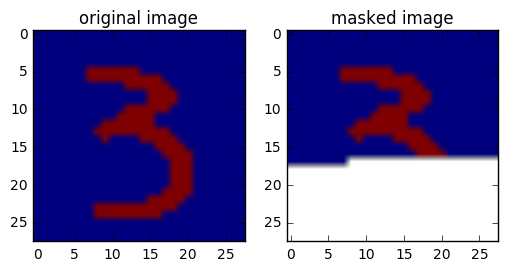

reconstructed images


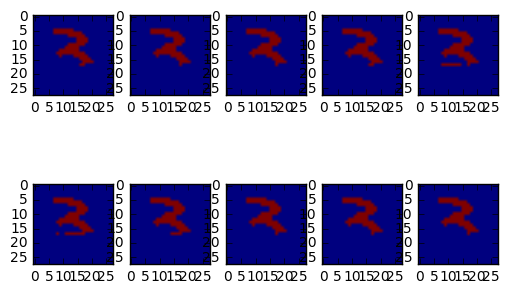

GRU 32 28
loaded ../models/inpainting_GRU_32_28_store_dict.npy


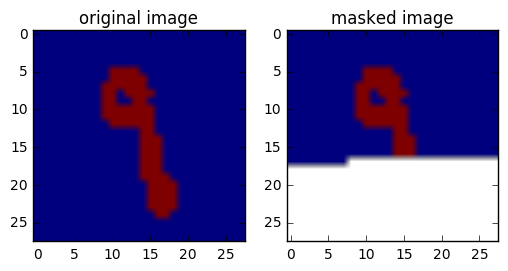

reconstructed images


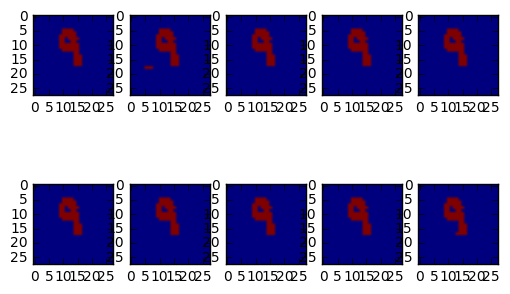

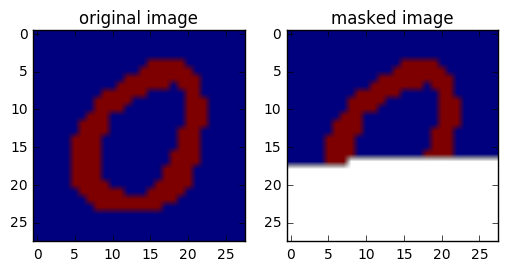

reconstructed images


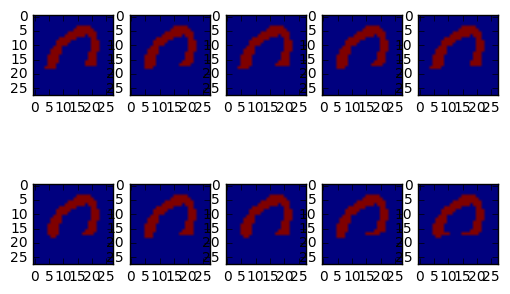

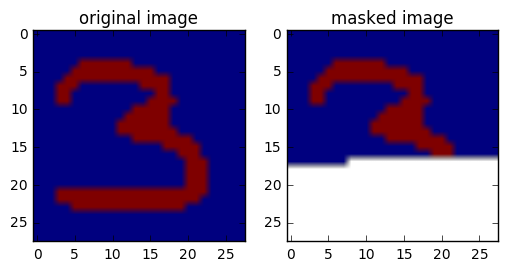

reconstructed images


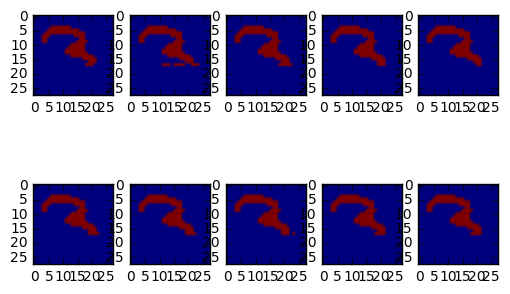

GRU 32 300
loaded ../models/inpainting_GRU_32_300_store_dict.npy


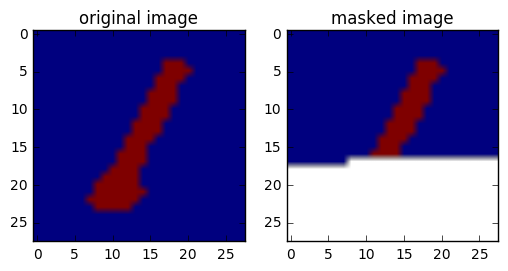

reconstructed images


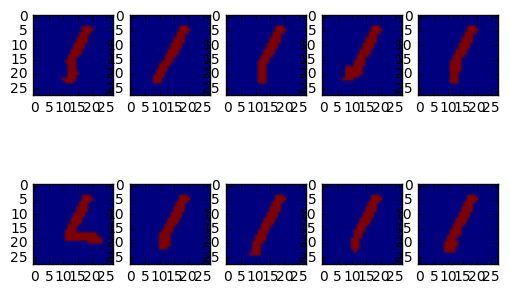

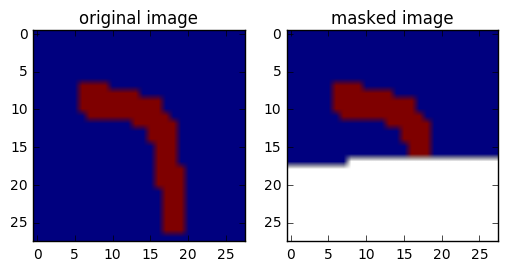

reconstructed images


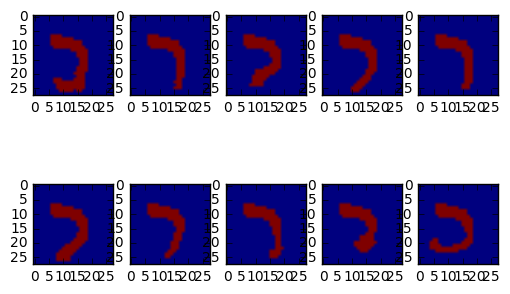

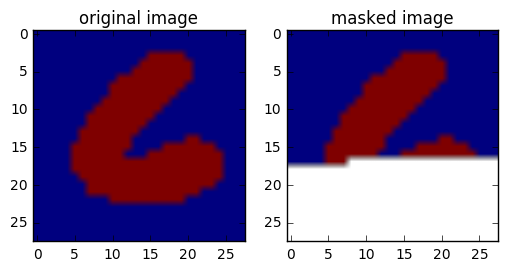

reconstructed images


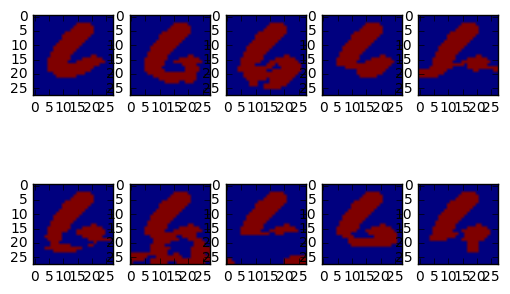

GRU 64 1
loaded ../models/inpainting_GRU_64_1_store_dict.npy


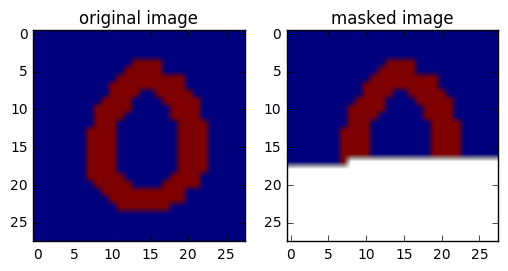

reconstructed images


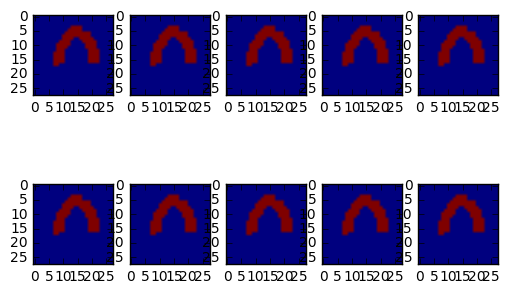

GRU 64 10
loaded ../models/inpainting_GRU_64_10_store_dict.npy


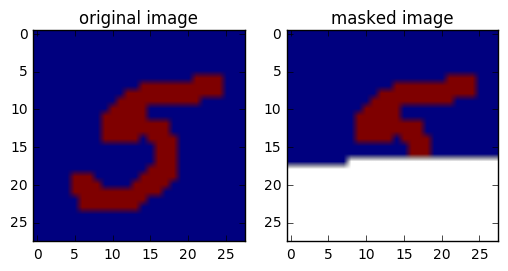

reconstructed images


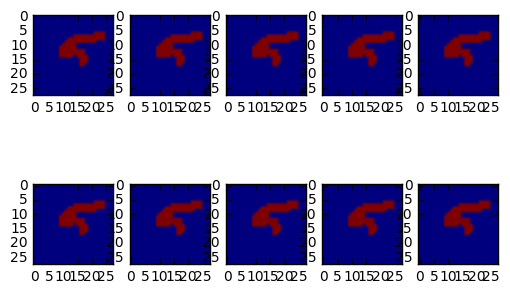

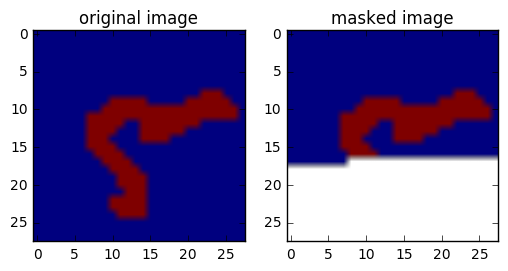

reconstructed images


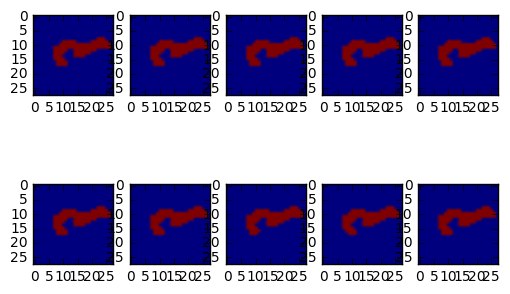

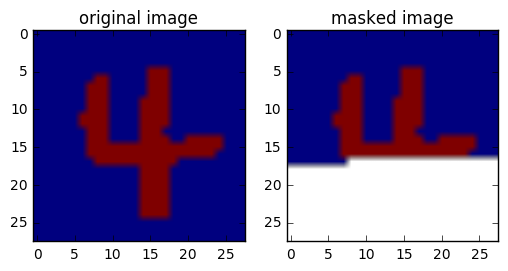

reconstructed images


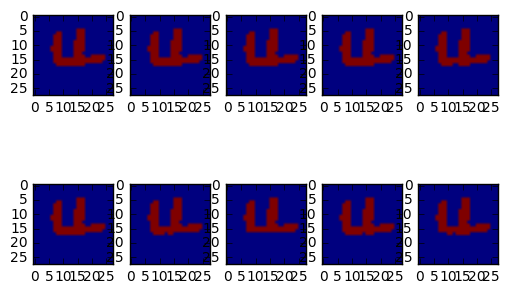

GRU 64 28
loaded ../models/inpainting_GRU_64_28_store_dict.npy


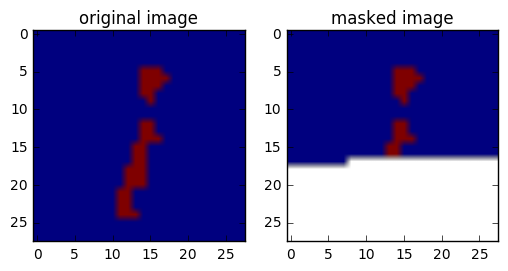

reconstructed images


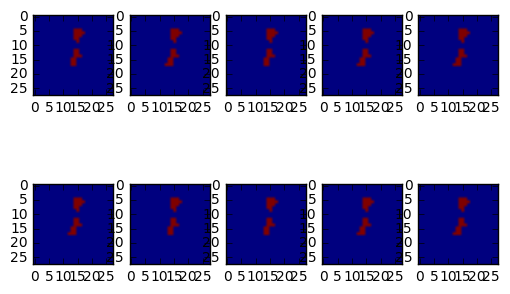

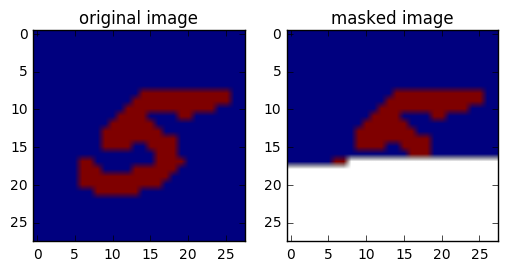

reconstructed images


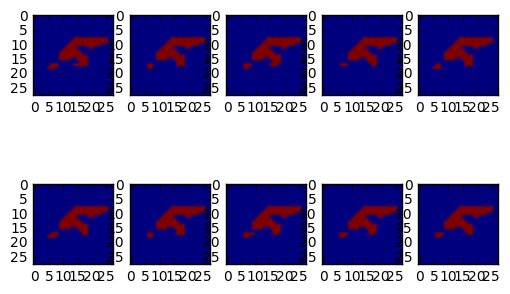

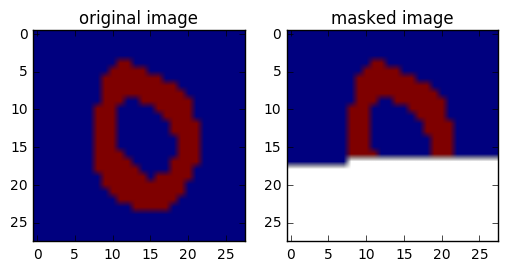

reconstructed images


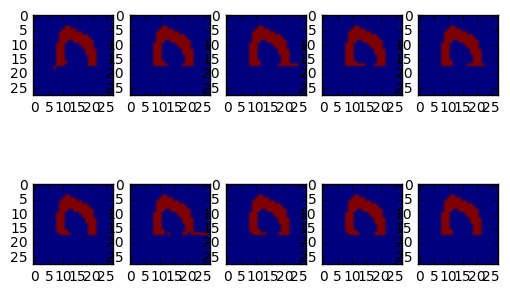

GRU 64 300
loaded ../models/inpainting_GRU_64_300_store_dict.npy


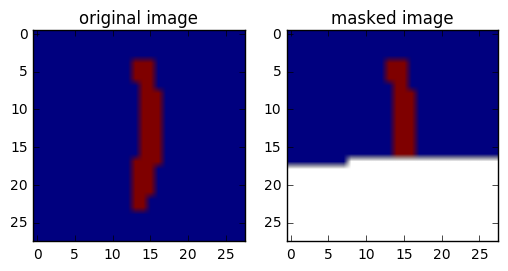

reconstructed images


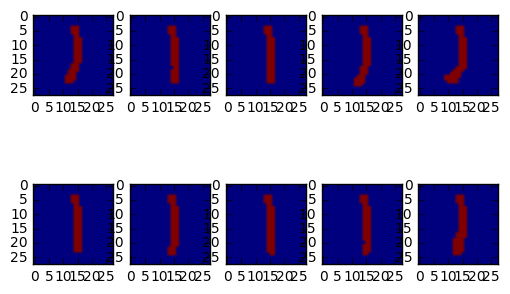

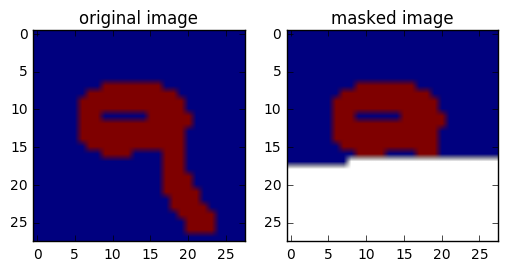

reconstructed images


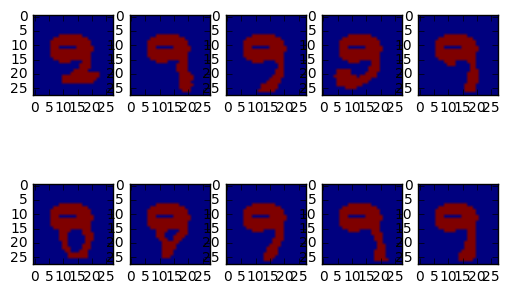

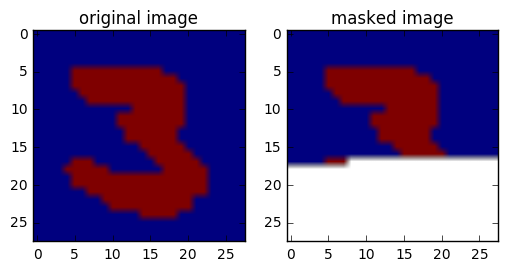

reconstructed images


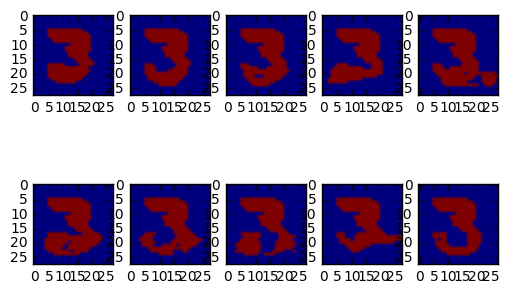

GRU 128 1
loaded ../models/inpainting_GRU_128_1_store_dict.npy


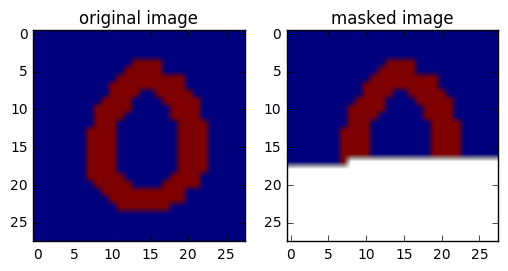

reconstructed images


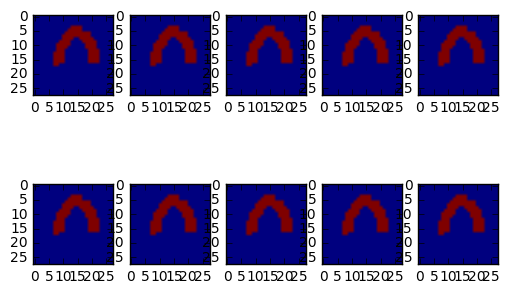

GRU 128 10
loaded ../models/inpainting_GRU_128_10_store_dict.npy


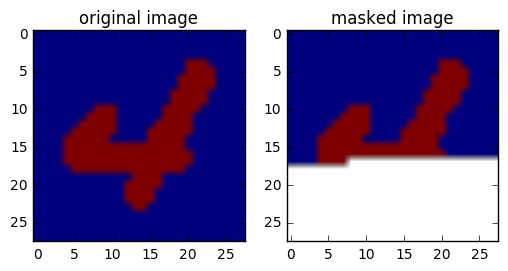

reconstructed images


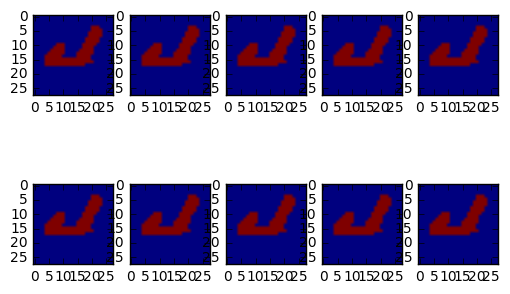

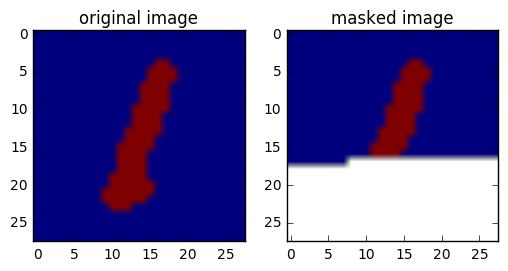

reconstructed images


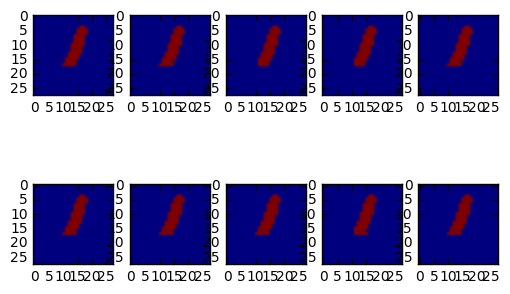

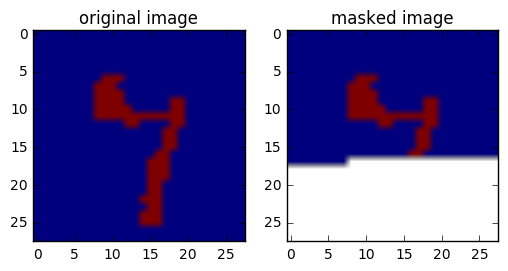

reconstructed images


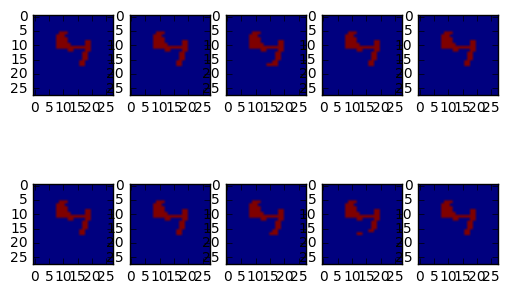

GRU 128 28
loaded ../models/inpainting_GRU_128_28_store_dict.npy


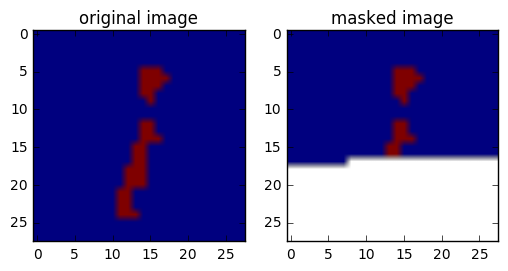

reconstructed images


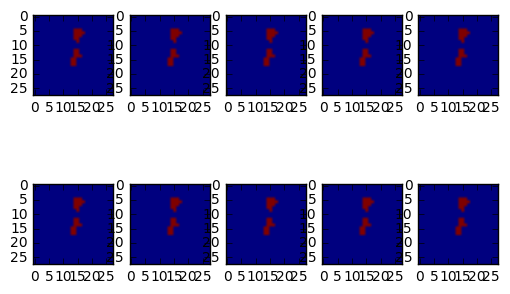

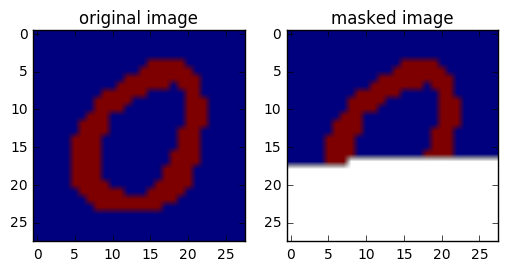

reconstructed images


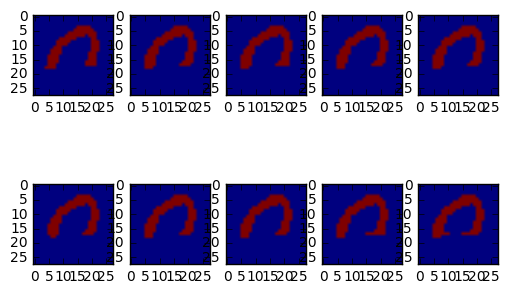

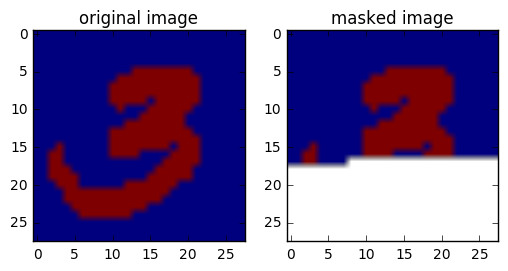

reconstructed images


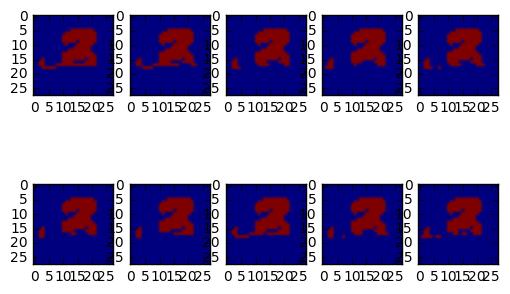

GRU 128 300
loaded ../models/inpainting_GRU_128_300_store_dict.npy


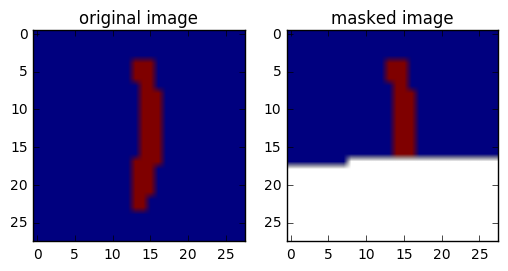

reconstructed images


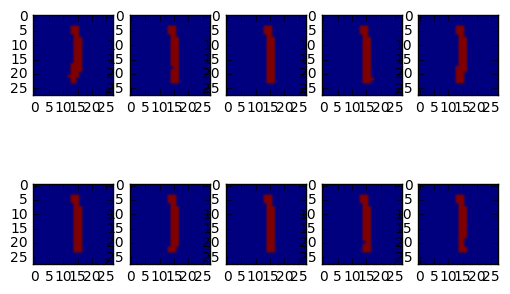

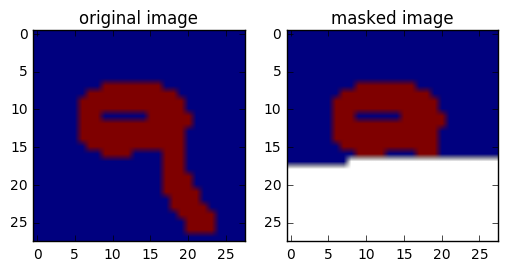

reconstructed images


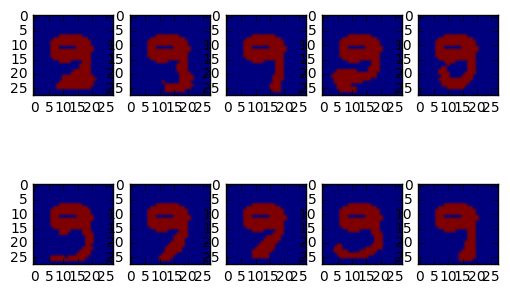

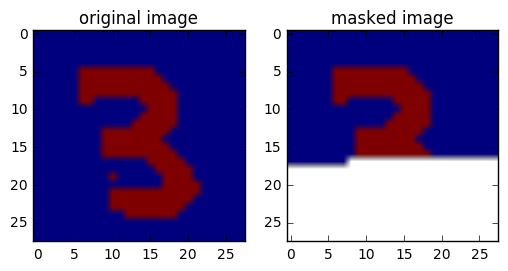

reconstructed images


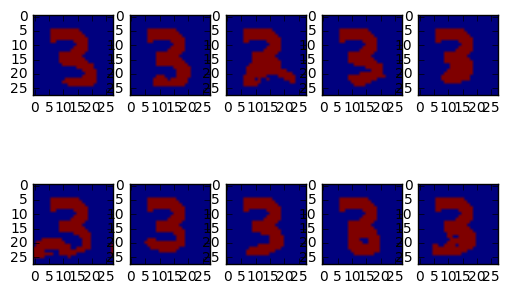

GRU stack_32 1
loaded ../models/inpainting_GRU_stack_32_1_store_dict.npy


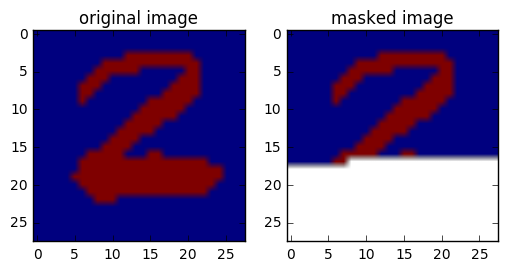

reconstructed images


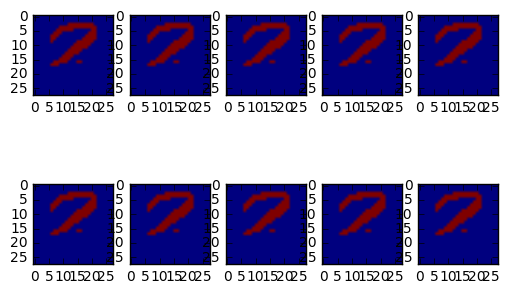

GRU stack_32 10
loaded ../models/inpainting_GRU_stack_32_10_store_dict.npy


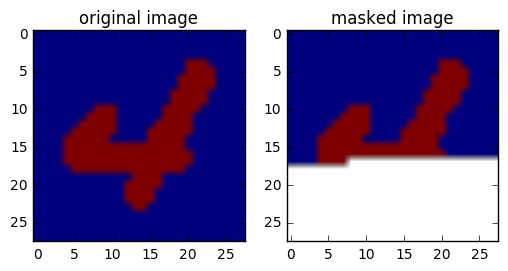

reconstructed images


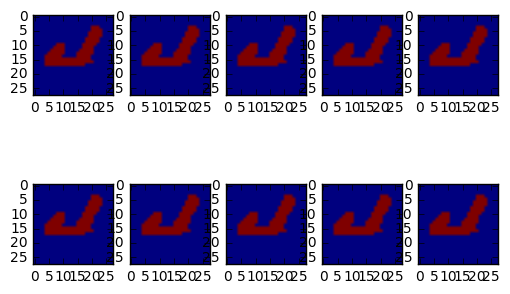

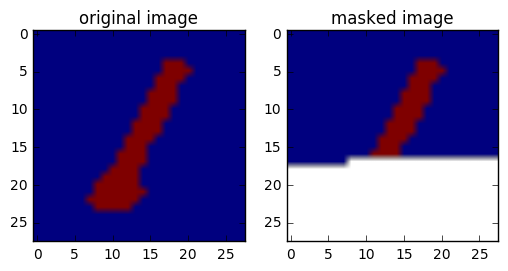

reconstructed images


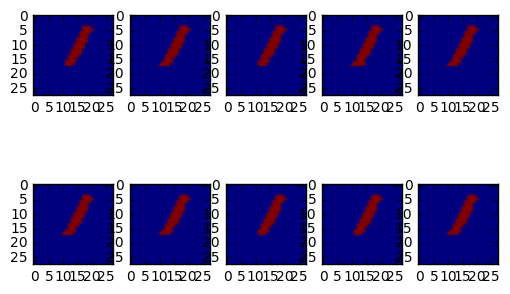

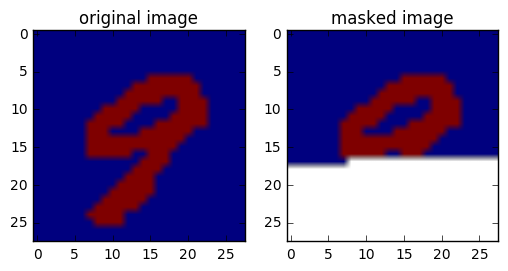

reconstructed images


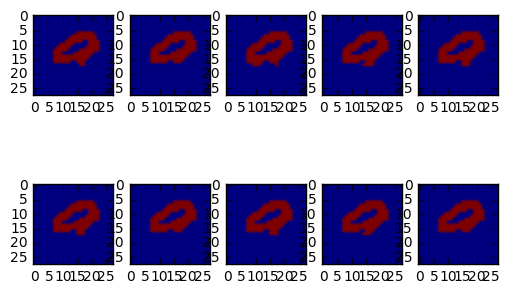

GRU stack_32 28
loaded ../models/inpainting_GRU_stack_32_28_store_dict.npy


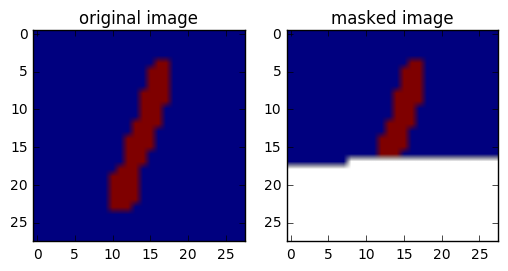

reconstructed images


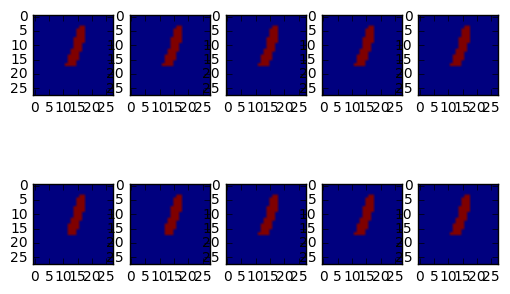

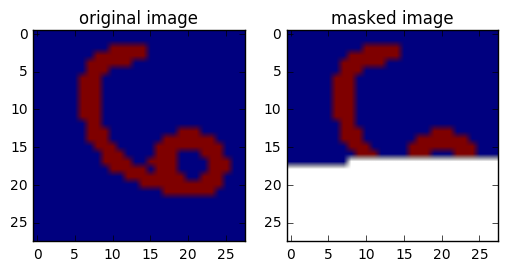

reconstructed images


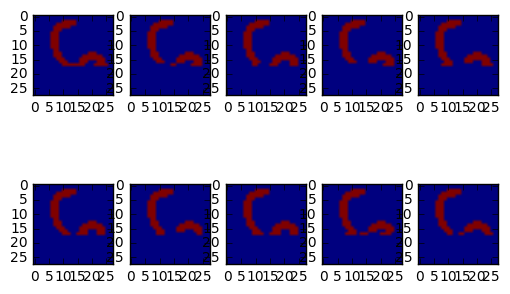

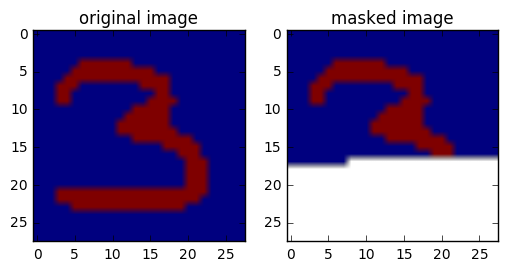

reconstructed images


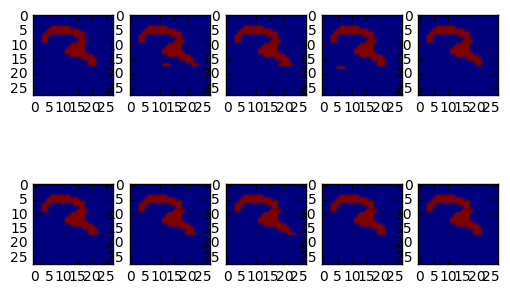

GRU stack_32 300
loaded ../models/inpainting_GRU_stack_32_300_store_dict.npy


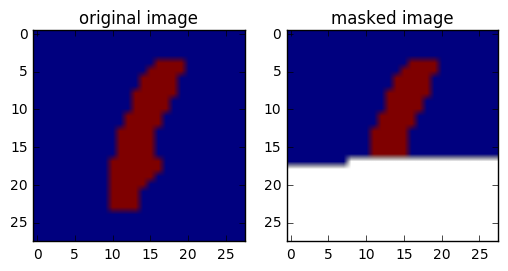

reconstructed images


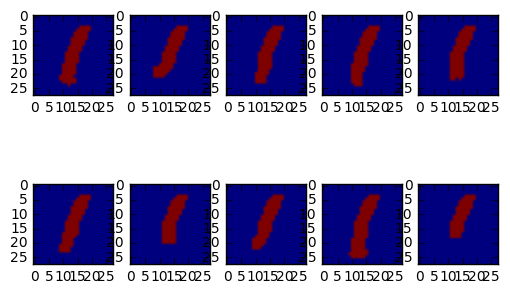

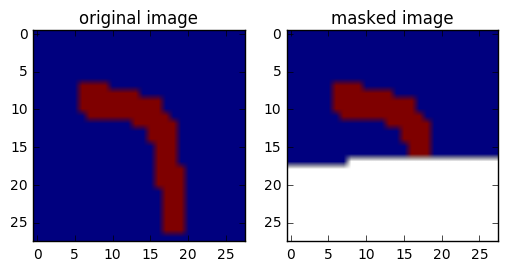

reconstructed images


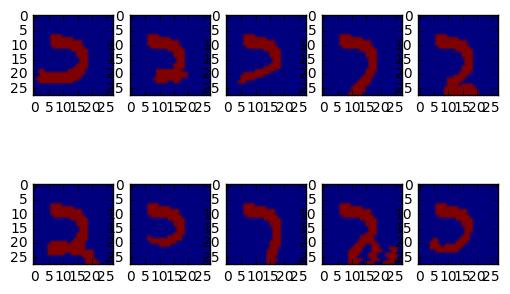

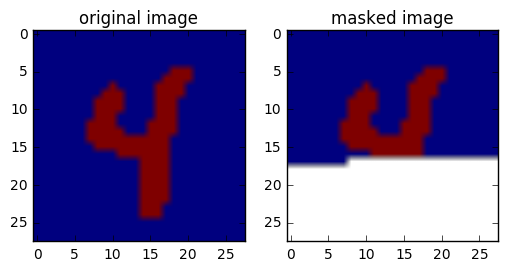

reconstructed images


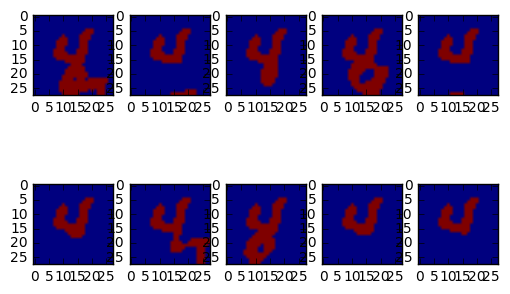

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import savefig

# unit_name = "GRU"
# mode = "32"
# pred_length = 300

for unit_name in ["GRU"]:
    for mode in ["32", "64", "128", "stack_32"]:
        for pred_length in [1, 10, 28, 300]:
            print(unit_name, mode, pred_length)
            def load_data():
                store_dict = np.load("../models/inpainting_{}_{}_{}_store_dict.npy".format(unit_name, mode, pred_length)).item()
                print("loaded ../models/inpainting_{}_{}_{}_store_dict.npy".format(unit_name, mode, pred_length))
                return store_dict

            store_dict = load_data()

            inpainting_loss_list = store_dict["inpainting_loss_list"]
            ground_truth_loss_list = store_dict["ground_truth_loss_list"]
            random_reconstruction = store_dict["random_reconstruction"]
            X_test_original = store_dict["X_test_original"]
            y_test_original = store_dict["y_test_original"]
            masked_images = X_test_original.copy()
            masked_images[:, -300:] = np.nan


            inpainting_mean = np.mean(inpainting_loss_list, axis=0)
            ground_truth_mean = np.mean(ground_truth_loss_list, axis=0)
            inpainting_std = np.std(inpainting_loss_list, axis=0)
            ground_truth_std = np.std(ground_truth_loss_list, axis=0)


            flag_dict = {}
            flag_dict["success"] = np.where(inpainting_mean == inpainting_mean.min())[0][0]
            flag_dict["fail"] = np.where(ground_truth_mean == ground_truth_mean.max())[0][0]
            flag_dict["high_varinace"] = np.where(inpainting_std == inpainting_std.max())[0][0]

            flag = ["success", "fail", "high_varinace"]
            if pred_length == 1:
                flag = ["success"]
            for f in flag:
                index = flag_dict[f]
#                 print("the index of the image is {}".format(index))
#                 print("the label was {}".format(np.argmax(y_test_original[index])))
#                 print()
                plt.plot([1,2,3])
                plt.subplot(121)
                plt.imshow(np.reshape(X_test_original[index],[28,28]))
                plt.title("original image")
                plt.subplot(122)
                plt.imshow(np.reshape(masked_images[index],[28,28]))
                plt.title("masked image")
                plt.show()
#                 savefig("./masked_images/{}_{}_{}_{}_original.png".format(unit_name, mode, pred_length, f))
                plt.plot()
#                 print(inpainting_mean)
#                 print(ground_truth_mean)
                
                
                
                print("reconstructed images")

                count = 0
                for i in range(2):
                    for j in range(5):
                        plt.subplot2grid((2,5), (i,j))
                        plt.imshow(np.reshape(random_reconstruction[index,count],[28,28]))
                        count += 1
                plt.show()
#                 savefig("./masked_images/{}_{}_{}_{}_reconstructed.png".format(unit_name, mode, pred_length, f))

# print the inpaiting and ground truth error

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import savefig

# unit_name = "GRU"
# mode = "32"
# pred_length = 300

for unit_name in ["GRU"]:
    for mode in ["32", "64", "128", "stack_32"]:
        for pred_length in [1, 10, 28, 300]:
#             print(unit_name, mode, pred_length)
            def load_data():
                store_dict = np.load("../models/inpainting_{}_{}_{}_store_dict.npy".format(unit_name, mode, pred_length)).item()
#                 print("loaded ../models/inpainting_{}_{}_{}_store_dict.npy".format(unit_name, mode, pred_length))
                return store_dict

            store_dict = load_data()

            inpainting_loss_list = store_dict["inpainting_loss_list"]
            ground_truth_loss_list = store_dict["ground_truth_loss_list"]
            random_reconstruction = store_dict["random_reconstruction"]
            X_test_original = store_dict["X_test_original"]
            y_test_original = store_dict["y_test_original"]
            masked_images = X_test_original.copy()
            masked_images[:, -300:] = np.nan


            inpainting_mean = np.mean(inpainting_loss_list, axis=0)
            ground_truth_mean = np.mean(ground_truth_loss_list, axis=0)
            inpainting_std = np.std(inpainting_loss_list, axis=0)
            ground_truth_std = np.std(ground_truth_loss_list, axis=0)
            print("{} {}, {} steps & {:.4f} & {:.4f}\\\\".format(unit_name, mode.replace("_", " "), pred_length, np.mean(inpainting_mean), np.mean(ground_truth_mean)))
            print("\\hline")


GRU 32, 1 steps & 0.2077 & 0.1930\\
\hline
GRU 32, 10 steps & 0.2200 & 0.2801\\
\hline
GRU 32, 28 steps & 0.1256 & 0.1962\\
\hline
GRU 32, 300 steps & 0.0762 & 0.1124\\
\hline
GRU 64, 1 steps & 0.1903 & 0.1962\\
\hline
GRU 64, 10 steps & 0.2087 & 0.2903\\
\hline
GRU 64, 28 steps & 0.1236 & 0.1996\\
\hline
GRU 64, 300 steps & 0.0721 & 0.1212\\
\hline
GRU 128, 1 steps & 0.1671 & 0.2137\\
\hline
GRU 128, 10 steps & 0.1901 & 0.3119\\
\hline
GRU 128, 28 steps & 0.1132 & 0.2252\\
\hline
GRU 128, 300 steps & 0.0648 & 0.1340\\
\hline
GRU stack 32, 1 steps & 0.1862 & 0.1960\\
\hline
GRU stack 32, 10 steps & 0.2093 & 0.2945\\
\hline
GRU stack 32, 28 steps & 0.1181 & 0.2134\\
\hline
GRU stack 32, 300 steps & 0.0896 & 0.1292\\
\hline


In [9]:
# import matplotlib.pyplot as plt
# import numpy as np
# from pylab import savefig

# a = """
# \\begin{figure}[H]
# """

# c = """
# \\end{figure}
# """
# # unit_name = "GRU"
# # mode = "32"
# # pred_length = 300

# for unit_name in ["GRU"]:
#     for mode in ["32", "64", "128", "stack_32"]:
#         for pred_length in [1, 10, 28, 300]:


#             flag = ["success", "fail", "high_varinace"]
#             if pred_length == 1:
#                 flag = ["success"]
#             for f in flag:
# #                 index = flag_dict[f]
# #                 b = "\\caption{" + "{},{}step,{} origin".format(mode.replace("_", " "), pred_length, f.replace("_", " ")) + "}\n"
# #                 b += "\\includegraphics[scale=.8]{" + "{}_{}_{}_{}_original.png".format(unit_name, mode, pred_length, f) + "}\n\\centering"
# #                 print(a + b + c)
                
#                 b = "\\caption{" + "{},{}step,{} paint".format(mode.replace("_", " "), pred_length, f.replace("_", " ")) + "}\n"
#                 b += "\\includegraphics[scale=.8]{" + "{}_{}_{}_{}_reconstructed.png".format(unit_name, mode, pred_length, f) + "}\n\\centering"
#                 print(a + b + c)
                
                